In [1]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import threading
import time
from multiprocessing import Pool
import multiprocessing.pool
import matplotlib.cm as cm
from lib.get_L2 import get_Bais
import pathlib
# plt.rc('text', usetex=True)
plt.rc('font',**{'size':'40'})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 2
# plt.rc('axes.formatter', use_mathtext=True)
centm=1/2.54

In [2]:
res = {"L2" : [],
    "L2_true" : [],
    "N" : [],
    "std" : [],
    "jump" : [],
    "jump_prob" : [],
    "ve" : [],
    "dim" : []
    }
res = pd.DataFrame(res)

In [7]:
files = glob.glob("./results_torus/*")

In [8]:
len(files)

71637

In [9]:
files[0]

'./results_torus/sample_100004481608045384506620329795667281298.csv'

In [10]:
def read_res(A):
    return pd.read_csv(A)
if __name__ == '__main__':
    with Pool(96) as p:
        dfList = p.map(read_res,files)

In [11]:
res = []
for F in dfList:
    res.append(F)
res = pd.concat(res, axis=0, ignore_index=True)

In [30]:
res.columns

Index(['L2', 'L2_true', 'N', 'std', 'jump', 'jump_prob', 've', 'dim'], dtype='object')

In [7]:
res['std'].unique(), res['ve'].unique()

(array([0.01, 0.2 , 0.05]), array([0.01  , 0.001 , 0.0025]))

In [13]:
res.to_csv('/user/bi/u12153/OTO/Torus_Data_combined.csv', index = False)

# Fig 2

In [17]:
D2a = res[(res['std'] == .01)&(res['dim'] == 1)]
D2b = res[(res['ve'] == .001)&(res['dim'] == 1)]

In [18]:
epsList = np.logspace(-3.7,1,50)
def get_l2a(eps):
    return get_Bais(std = .01,jump = .3 ,jump_prob = .5,ve = eps,Res = 500)
def get_l2b(eps):
    return get_Bais(std = .05,jump = .3 ,jump_prob = .5,ve = eps,Res = 500)
def get_l2c(eps):
    return get_Bais(std = .2,jump = .3 ,jump_prob = .5,ve = eps,Res = 500)

In [19]:
tt = time.time()
if __name__ == '__main__':
    with Pool(96) as p:
        l2a = p.map(get_l2a,epsList)
        l2b = p.map(get_l2b,epsList)
        l2c = p.map(get_l2c,epsList)
print(time.time() - tt)

5.027127027511597


In [20]:
path = pathlib.Path(os.environ["COLD"])
MD = dict(np.load(path/"UlumData.npz"))
ThiloD = MD['L2'].reshape(50,3,3,50)
L2mean = np.mean(ThiloD, axis = 0)
L2std = np.std(ThiloD, axis=0)
MD['std'].reshape(50,3,3)[0,0,2]

0.1

In [12]:
path2 = pathlib.Path(os.environ["COLD"])
MD2 = dict(np.load("/mnt/ceph-hdd/cold/nhr_ni_starter_22625/EOT_data_20250905.npz"))
ThiloD2 = MD2['L2'].reshape(50,3,2,50)
L2mean2 = np.mean(ThiloD2, axis = 0)
L2std2 = np.std(ThiloD2, axis=0)
MD2['std'].reshape(50,3,2)[0,1,0]

0.05

In [24]:
np.savez('./l2s.npz', l2a, l2b, l2c)

/local/jobs/u12153_10792569/ipykernel_2911549/1009993764.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g2 = sns.lineplot(data = D2a,x = 'N', y = 'L2_true', hue = 've', ax = ax[1],palette = sns.color_palette("husl", 8))
/local/jobs/u12153_10792569/ipykernel_2911549/1009993764.py:17: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g4 = sns.lineplot(data = D2a,x = 'N', y = 'L2', hue = 've', ax = ax[3],palette = sns.color_palette("husl", 8))


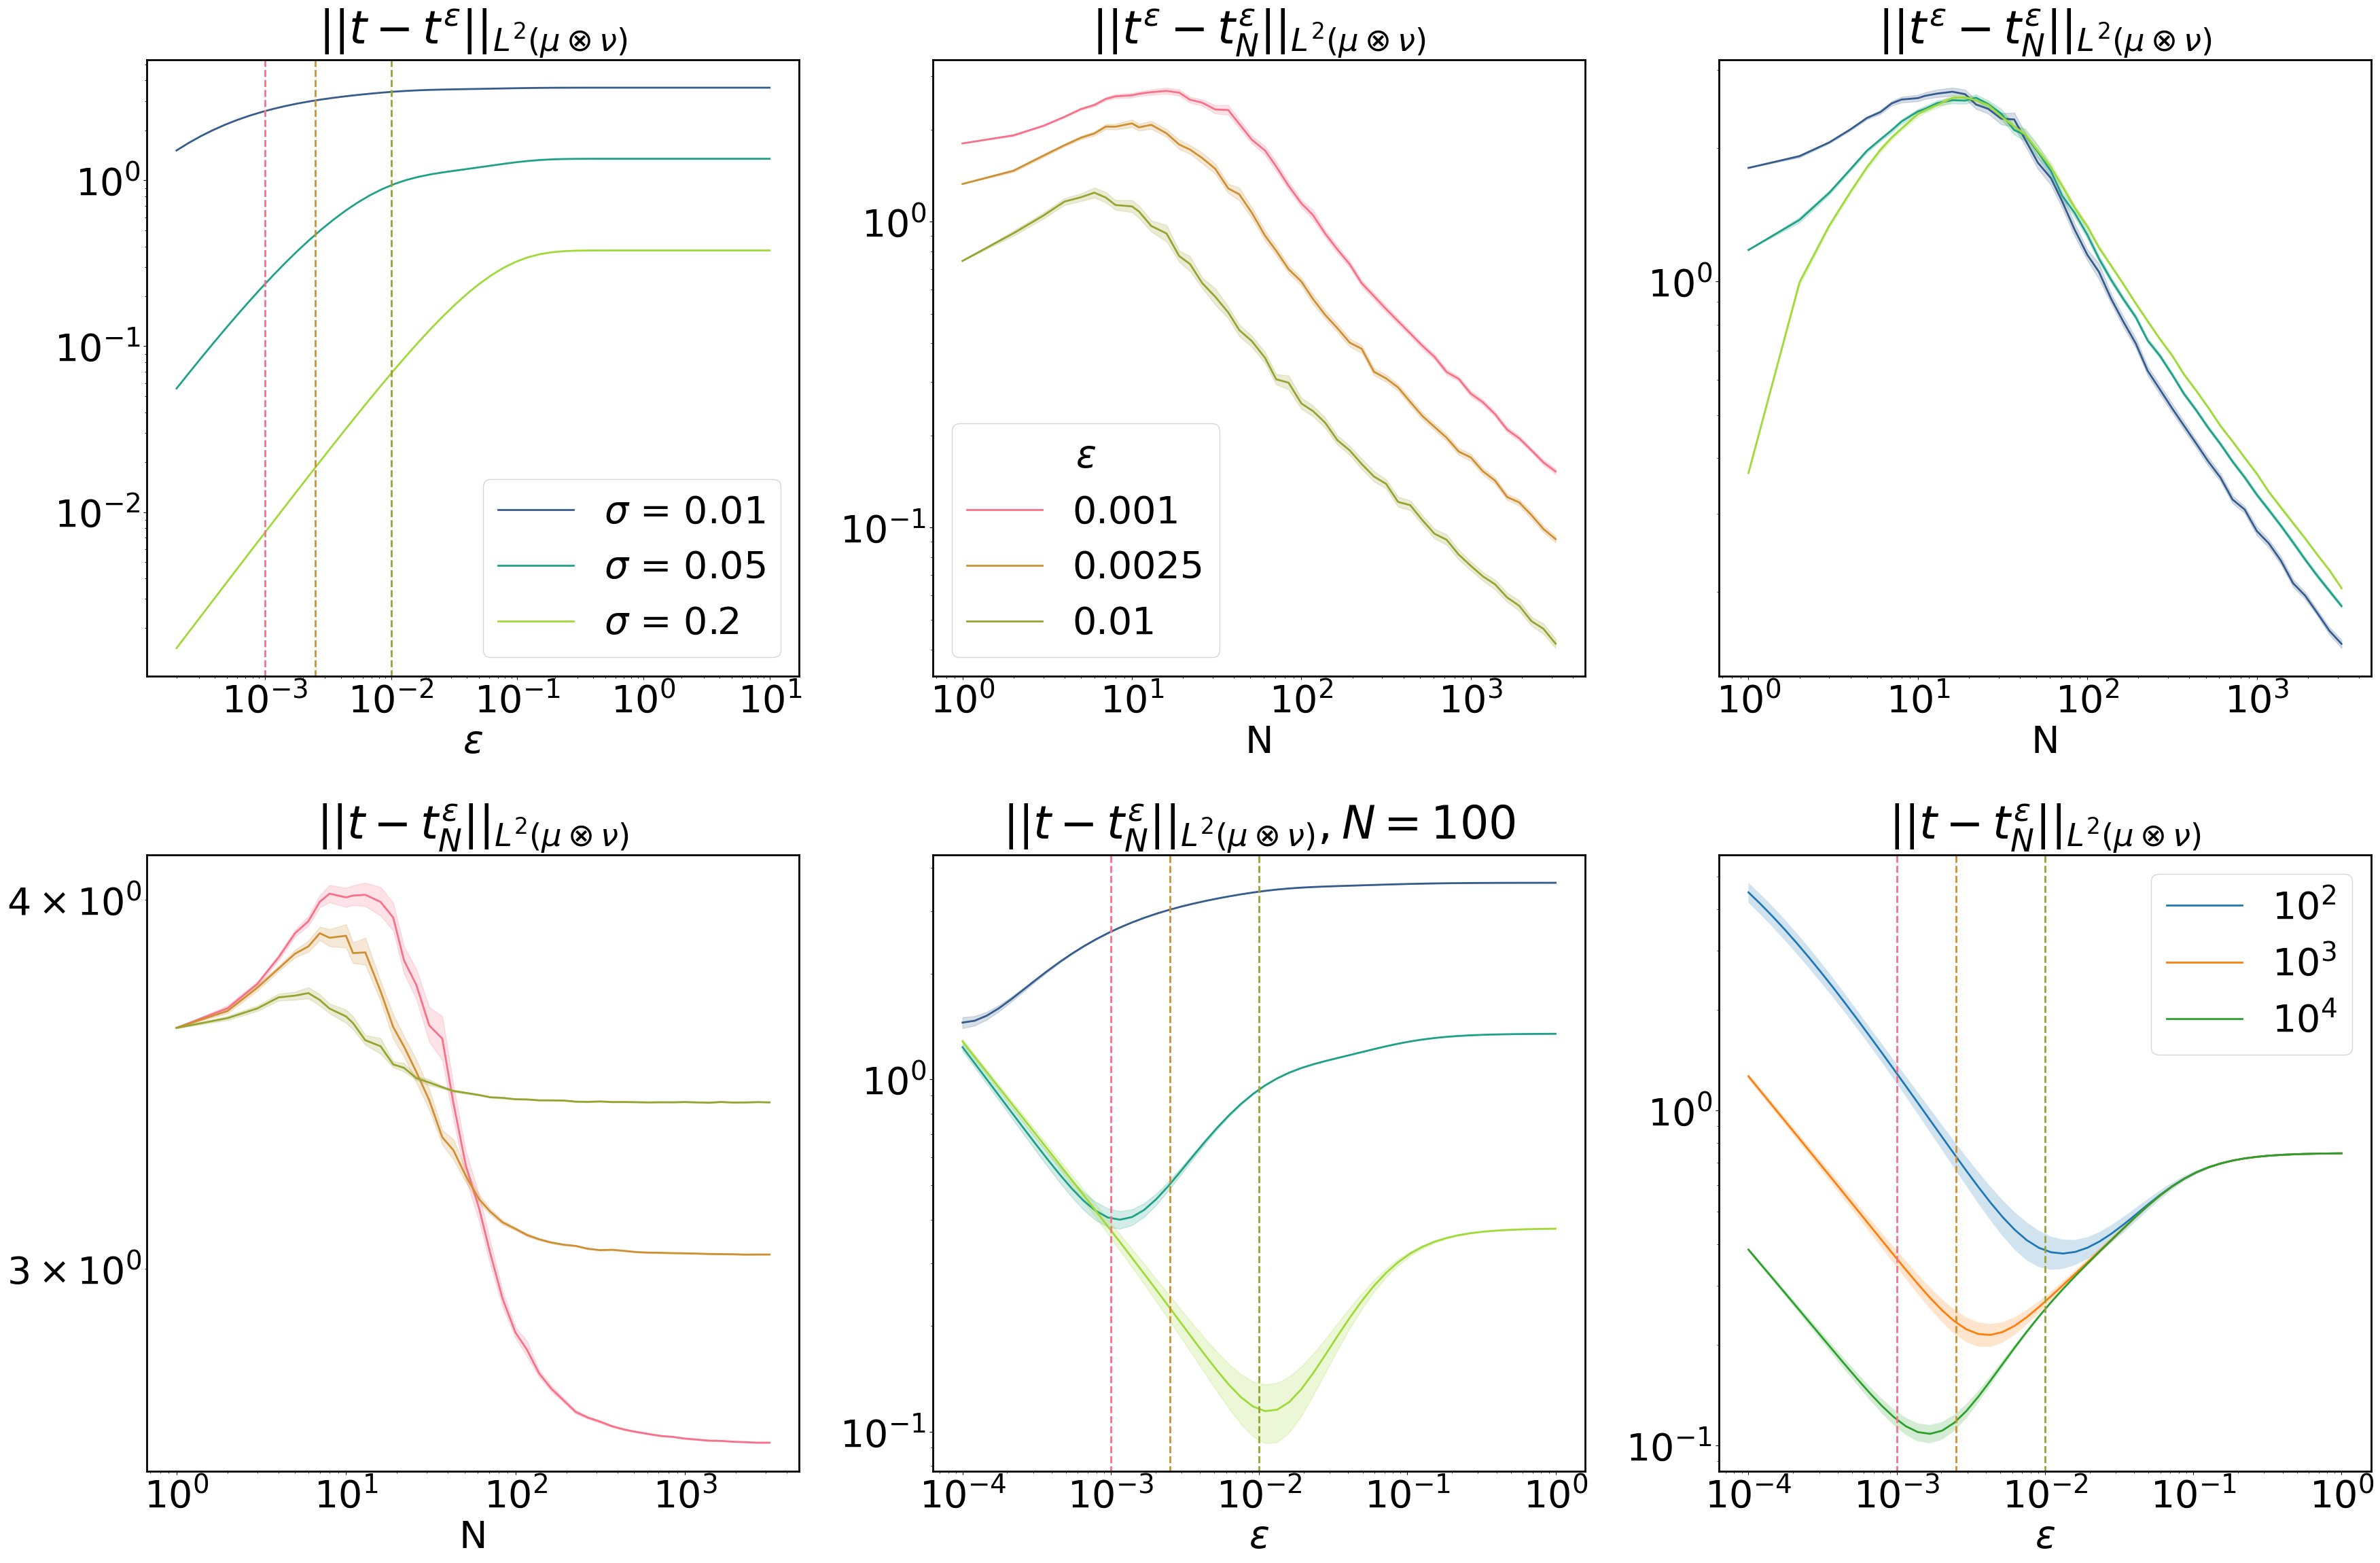

In [38]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (36,24))
ax = ax.ravel()

ax[0].plot(epsList,l2a,label='$\sigma$ = 0.01', color = sns.color_palette("viridis")[1])
ax[0].plot(epsList,l2b,label='$\sigma$ = 0.05',color = sns.color_palette("viridis")[3])
ax[0].plot(epsList,l2c,label='$\sigma$ = 0.2', color = sns.color_palette("viridis")[5])
ax[0].legend()
ax[0].set_xlabel('$\epsilon$')
ax[0].set_title("$||t - t^{\epsilon}||_{L^2(\\mu \otimes \\nu)}$")

y0,y1 = ax[0].get_ylim()
for i,xx in enumerate([.001,.0025,.01]):
    ax[0].axvline(xx, y0, y1, linestyle = '--', color = sns.color_palette("husl", 8)[i])

g2 = sns.lineplot(data = D2a,x = 'N', y = 'L2_true', hue = 've', ax = ax[1],palette = sns.color_palette("husl", 8))
g3 = sns.lineplot(data = D2b,x = 'N', y = 'L2_true', hue = 'std', ax = ax[2],palette = sns.color_palette("viridis")[1::2])
g4 = sns.lineplot(data = D2a,x = 'N', y = 'L2', hue = 've', ax = ax[3],palette = sns.color_palette("husl", 8))

ax[1].get_legend().set_title("$\epsilon$")
ax[1].set_title("$||t^{\epsilon} - t^{\epsilon}_N||_{L^2(\\mu \otimes \\nu)}$")

# ax[2].get_legend().set_title("$\sigma$")
ax[2].legend_.remove()
ax[2].set_title("$||t^{\epsilon} - t^{\epsilon}_N||_{L^2(\\mu \otimes \\nu)}$")

ax[3].get_legend().set_title("$\epsilon$")
ax[3].set_title("$||t - t^{\epsilon}_N||_{L^2(\\mu \otimes \\nu)}$")




for j in range(3):
    ax[5].plot(MD['epsL'][0], L2mean[0,j,:], label = f"N = {MD['num'].reshape(50,3,3)[0,0,j]}")
ax[5].legend()
ax[5].legend(labels = ['$10^2$','$10^3$', '$10^4$'])
for j in range(3):
    ax[5].fill_between(MD['epsL'][0], L2mean[0,j,:]-L2std[0,j,:],L2mean[0,j,:]+L2std[0,j,:], alpha = .2)
ax[5].set_xlabel('$\epsilon$')
ax[5].set_title("$||t - t^{\epsilon}_N||_{L^2(\\mu \otimes \\nu)}$")

y0,y1 = ax[5].get_ylim()
for i,xx in enumerate([.001,.0025,.01]):
    ax[5].axvline(xx, y0, y1, linestyle = '--', color = sns.color_palette("husl", 8)[i])


for i in range(3):
    ax[4].plot(MD2['epsL'][0], L2mean2[i,0,:], label = f"$\sigma$ = {MD2['std'].reshape(50,3,2)[0,i,0]}", color = sns.color_palette("viridis")[1::2][i])
    ax[4].fill_between(MD2['epsL'][0], L2mean2[i,0,:]-L2std2[i,0,:],L2mean2[i,0,:]+L2std2[i,0,:], alpha = .2, color = sns.color_palette("viridis")[1::2][i])

ax[4].set_xlabel('$\epsilon$')
ax[4].set_title("$||t - t^{\epsilon}_N||_{L^2(\\mu \otimes \\nu)}, N = 100$")
ax[4].legend()

y0,y1 = ax[4].get_ylim()
for i,xx in enumerate([.001,.0025,.01]):
    ax[4].axvline(xx, y0, y1, linestyle = '--', color = sns.color_palette("husl", 8)[i])


for a in ax:
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_ylabel('')
ax[3].legend_.remove()
ax[4].legend_.remove()

plt.tight_layout()

In [30]:
ax[0].get_ylim()

(0.0010249863430716974, 5.341538846205429)

/local/jobs/u12153_10747195/ipykernel_398279/1405008257.py:8: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data = D2a,x = 'N', y = 'L2_true', hue = 've', ax = ax[1],palette = sns.color_palette("husl", 8))
/local/jobs/u12153_10747195/ipykernel_398279/1405008257.py:10: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data = D2a,x = 'N', y = 'L2', hue = 've', ax = ax[3],palette = sns.color_palette("husl", 8))


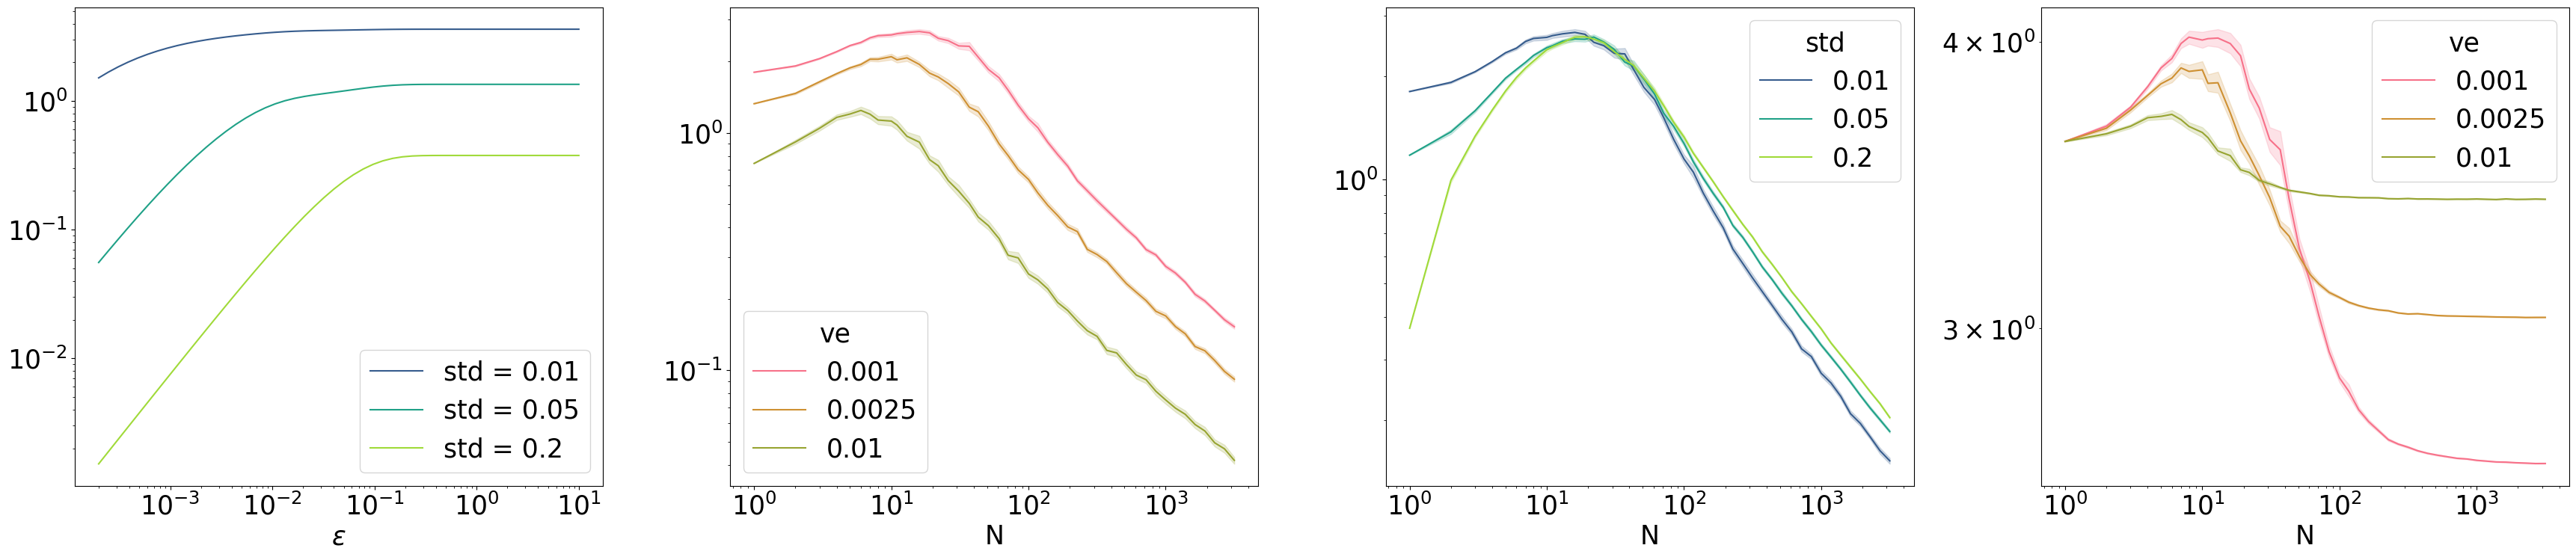

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize = (35,8))

ax[0].plot(epsList,l2a,label='std = 0.01', color = sns.color_palette("viridis")[1])
ax[0].plot(epsList,l2b,label='std = 0.05',color = sns.color_palette("viridis")[3])
ax[0].plot(epsList,l2c,label='std = 0.2', color = sns.color_palette("viridis")[5])
ax[0].legend()
ax[0].set_xlabel('$\epsilon$')
sns.lineplot(data = D2a,x = 'N', y = 'L2_true', hue = 've', ax = ax[1],palette = sns.color_palette("husl", 8))
sns.lineplot(data = D2b,x = 'N', y = 'L2_true', hue = 'std', ax = ax[2],palette = sns.color_palette("viridis")[1::2])
sns.lineplot(data = D2a,x = 'N', y = 'L2', hue = 've', ax = ax[3],palette = sns.color_palette("husl", 8))
for a in ax:
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_ylabel('')
plt.tight_layout()

# Fig 4

In [16]:
D3 = res[res['std'] == .01]]
ax = sns.relplot(D3,x = 'N', y = 'L2_true', hue = 'dim', col = 've',kind = 'line',palette = 'tab10')
ax.set(xscale = 'log')
ax.set(yscale = 'log')

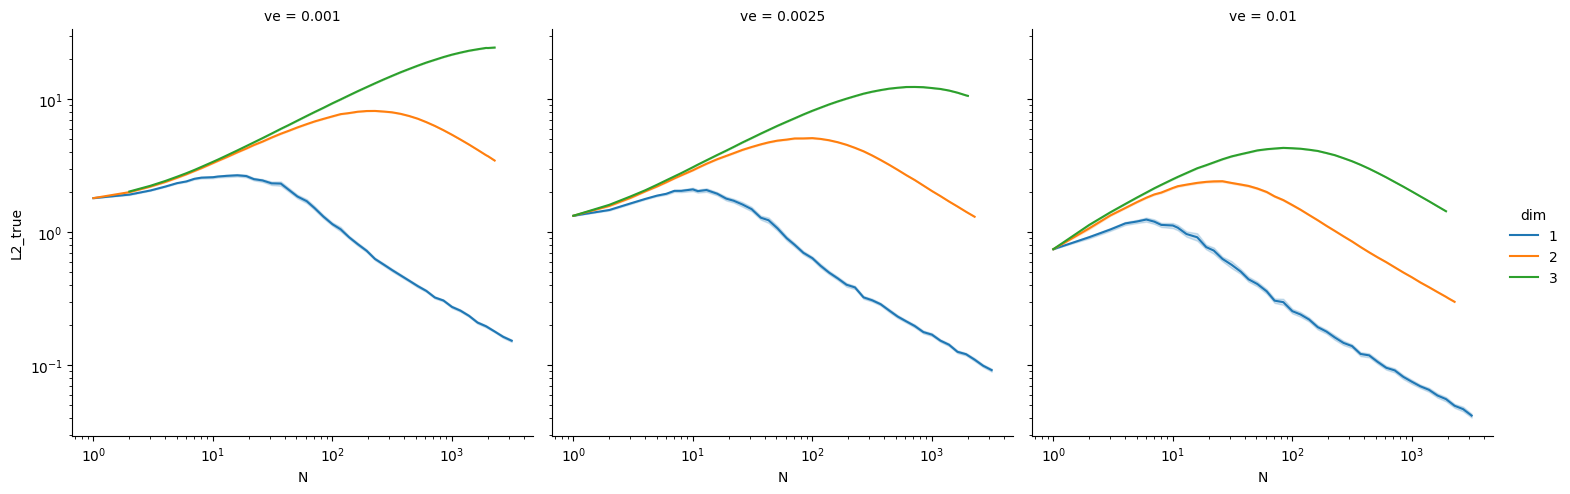

In [17]:
ax = sns.relplot(D3,x = 'N', y = 'L2_true', hue = 'dim', col = 've',kind = 'line',palette = 'tab10')
ax.set(xscale = 'log')
ax.set(yscale = 'log')

In [1]:
import pickle

In [26]:
with open('ResOTO.pkl', 'rb') as f:
    ResOTO = pickle.load(f)

with open('ResUlam.pkl', 'rb') as f:
    ResUlam = pickle.load(f)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4100510/3467385741.py:7: SyntaxWarning: invalid escape sequence '\s'
  ax[0,i].set_title(f"$\sigma$ = {std}")
/tmp/ipykernel_4100510/3467385741.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0,i].scatter(ev.real, ev.imag, c = cm.viridis((10 - j)/10), s = 100)
/tmp/ipykernel_4100510/3467385741.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify th

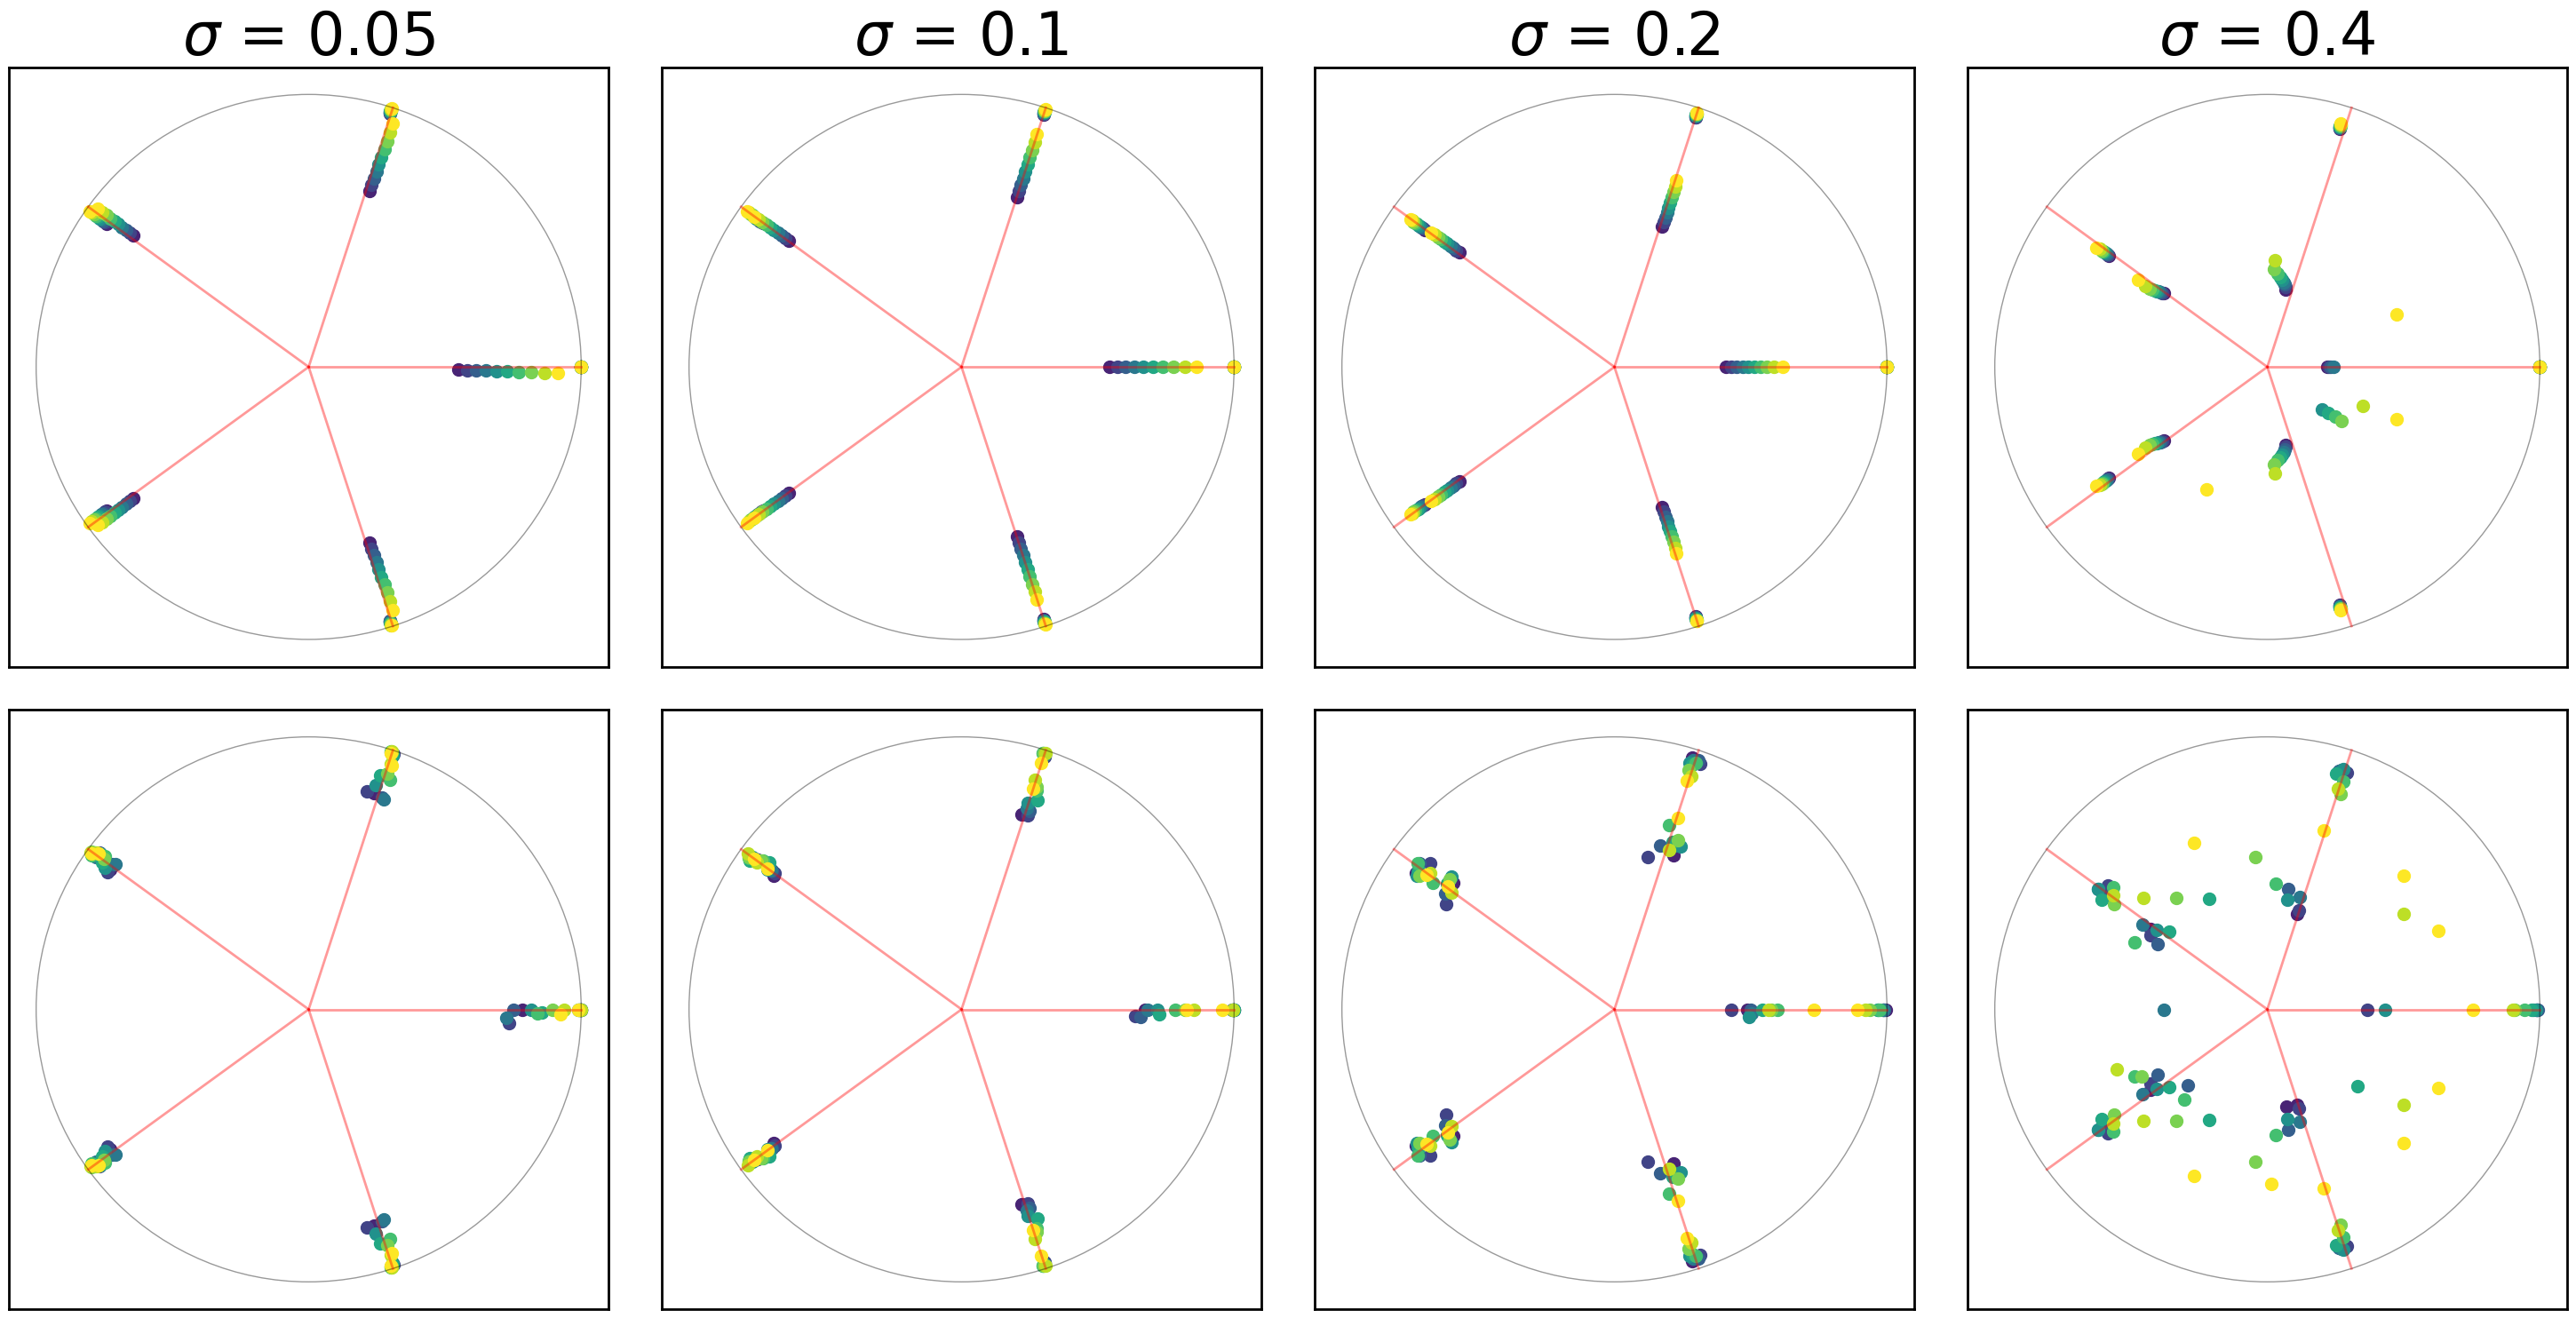

In [17]:
# ResOTO1 = ResOTO.copy()
# ResUlam1 = ResUlam.copy()
stdL = [t for t in ResOTO]
fig, ax = plt.subplots(ncols = len(stdL), nrows = 2, figsize = (15*2,8*2),sharex = True, sharey = True)

for i, std in enumerate(stdL):
    ax[0,i].set_title(f"$\sigma$ = {std}")
    for j in range(10)[::-1]:
        ev = ResOTO[std]['eval'][j]
        ev2 = ResUlam[std]['eval'][j]
        ax[0,i].scatter(ev.real, ev.imag, c = cm.viridis((10 - j)/10), s = 100)
        ax[1,i].scatter(ev2.real, ev2.imag, c = cm.viridis((10 - j)/10), s = 100)
for a in ax.ravel():
        
    for k in range(5):
        a.plot([0,np.cos(2*np.pi*k/5)],[0,np.sin(2*np.pi*k/5)], c = 'red', alpha = .4)
    circ = plt.Circle((0.0, 0.0), 1.0, facecolor='none', edgecolor='k', lw=1, alpha = .4)
    a.set_aspect('equal')
    a.set_xlim([-1.1,1.1])
    a.set_ylim([-1.1,1.1])
    a.set_xticks([])
    
    a.set_yticks([])
    a.add_patch(circ)
    a.set_ylabel('')

plt.tight_layout()
plt.savefig('./Ulam500_2d.pdf', format = 'pdf')

In [4]:
import pickle

In [5]:
with open('ResOTO2.pkl', 'rb') as f:
    ResOTO2 = pickle.load(f)

with open('ResUlam2.pkl', 'rb') as f:
    ResUlam2 = pickle.load(f)

with open('ResOTO.pkl', 'rb') as f:
    ResOTO = pickle.load(f)

with open('ResUlam.pkl', 'rb') as f:
    ResUlam = pickle.load(f)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4100510/4178940848.py:7: SyntaxWarning: invalid escape sequence '\s'
  ax[0,i].set_title(f"$\sigma$ = {std}")
/tmp/ipykernel_4100510/4178940848.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0,i].scatter(ev.real, ev.imag, c = cm.viridis((10 - j)/10), s = 100)
/tmp/ipykernel_4100510/4178940848.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify th

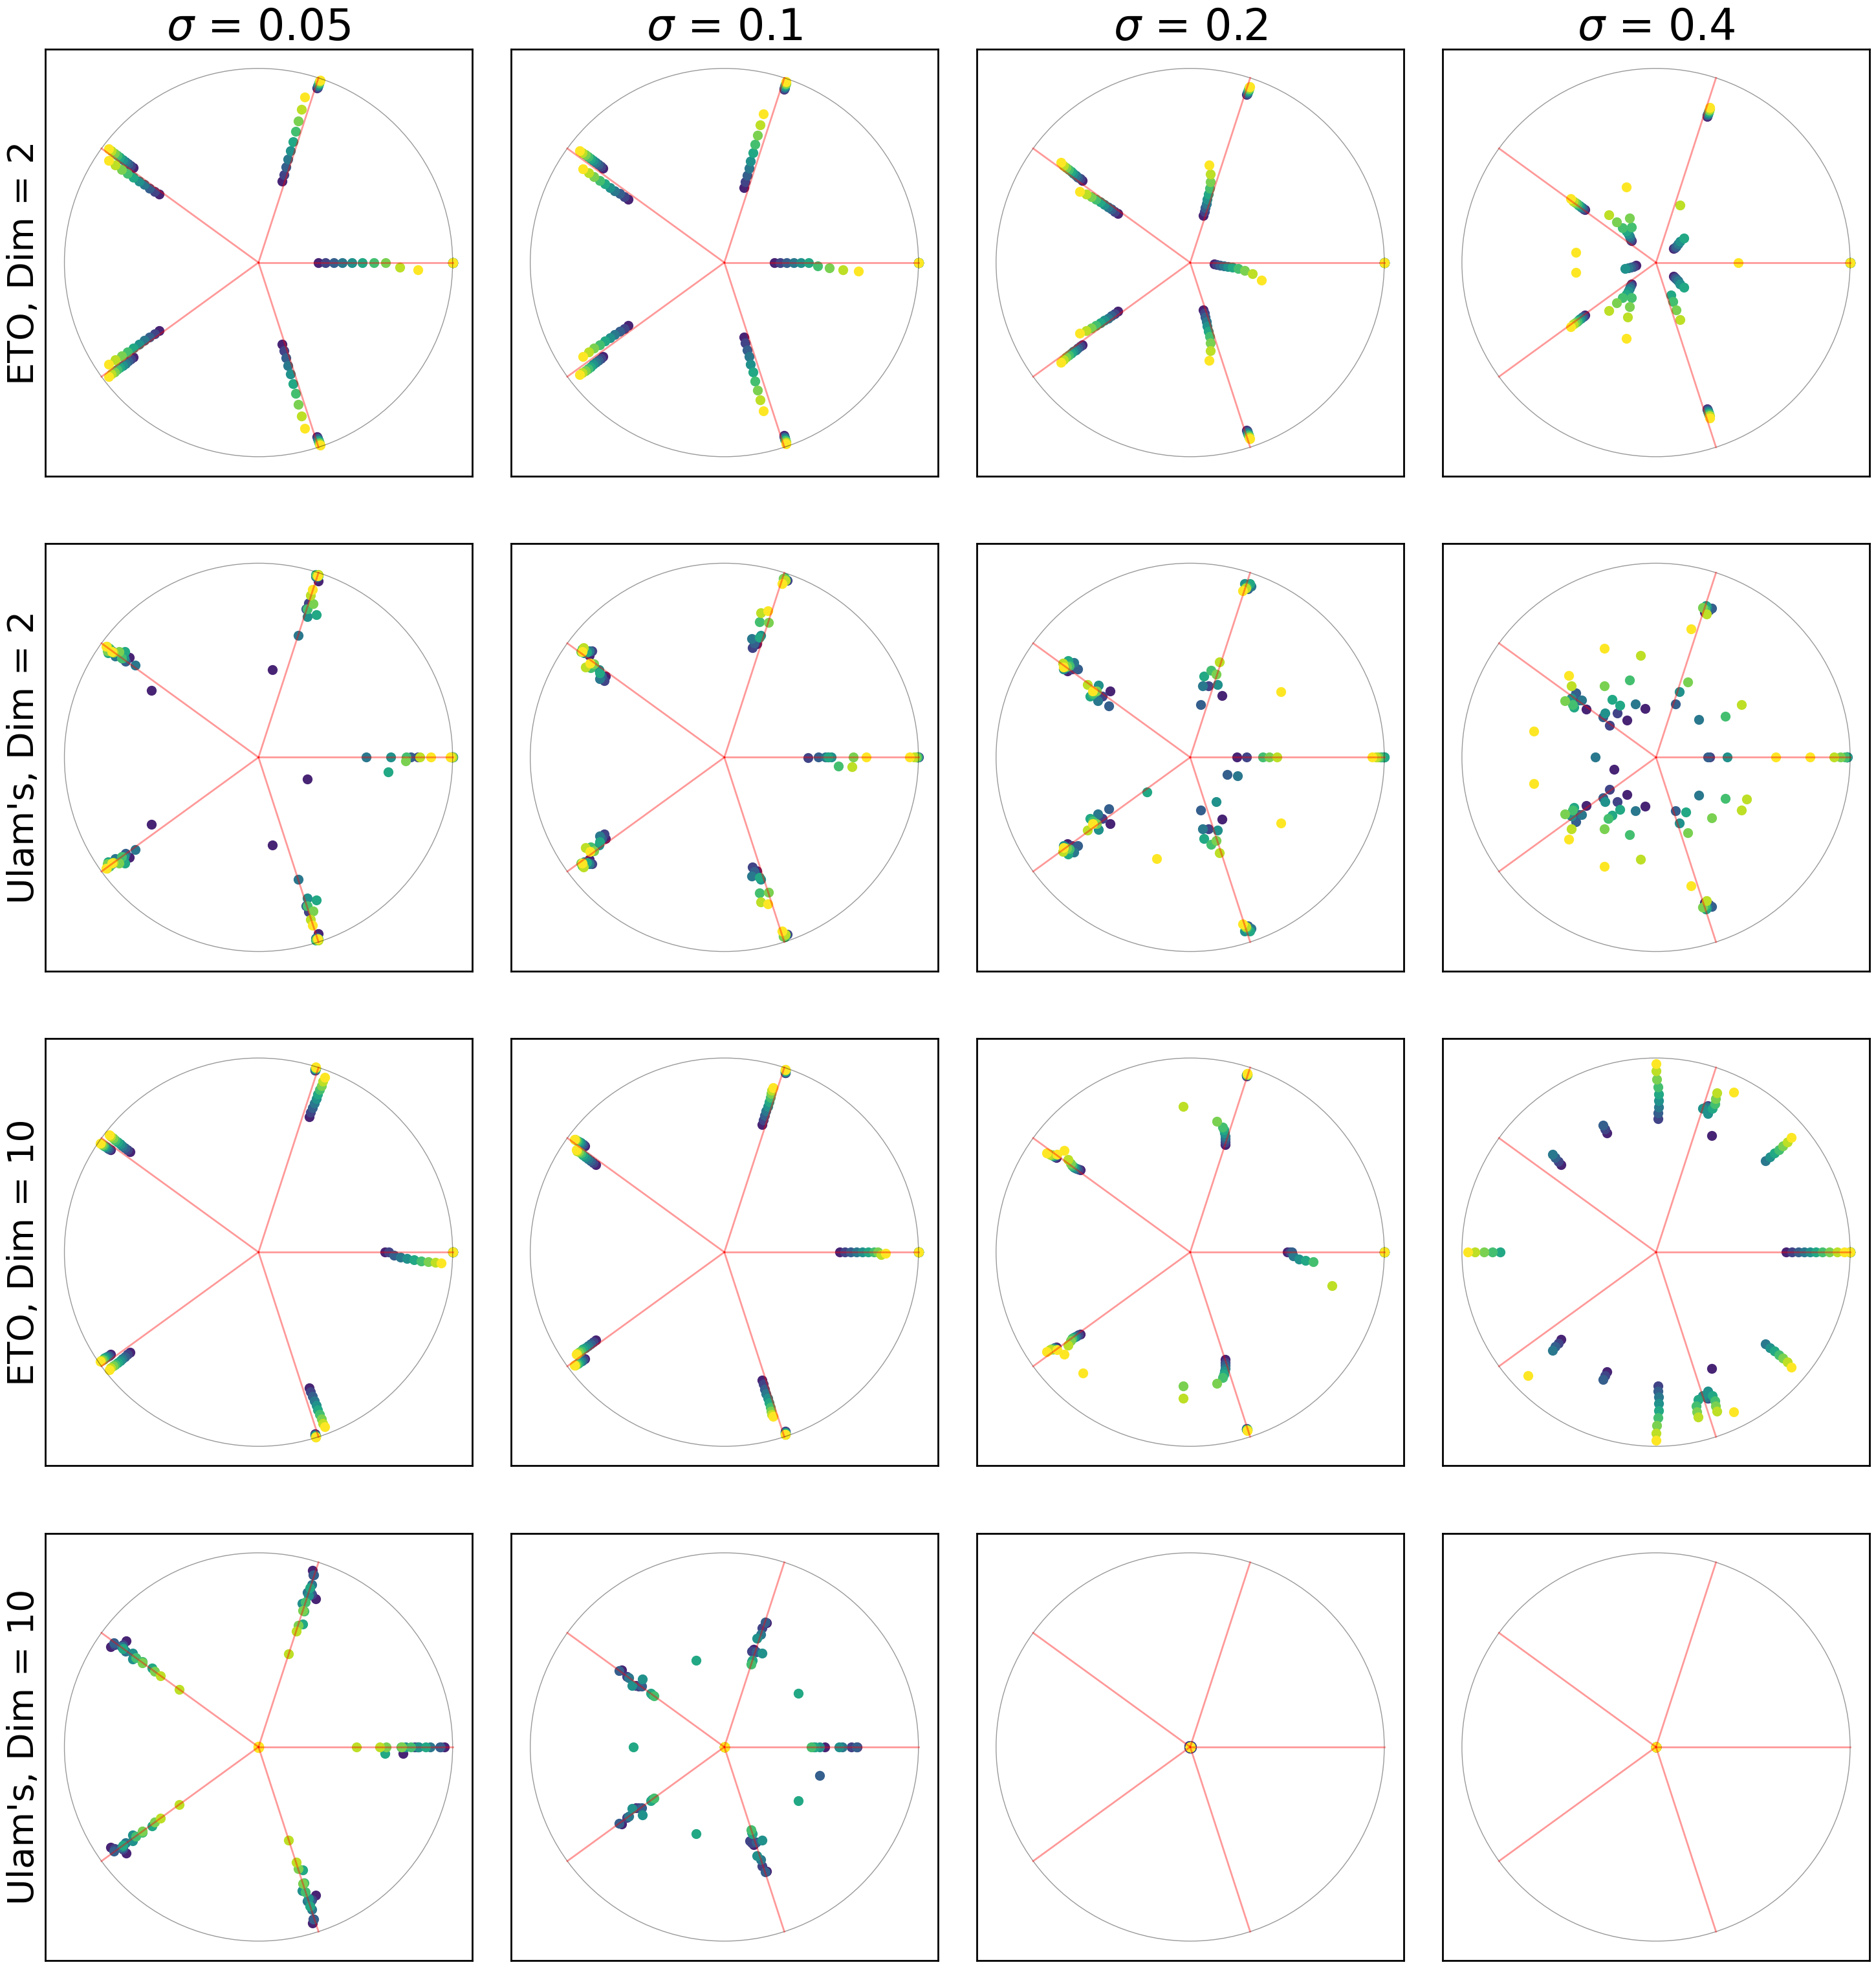

In [28]:
# ResOTO1 = ResOTO.copy()
# ResUlam1 = ResUlam.copy()
stdL = [t for t in ResOTO]
fig, ax = plt.subplots(ncols = len(stdL), nrows = 4, figsize = (15*2,8*4),sharex = True, sharey = True)

for i, std in enumerate(stdL):
    ax[0,i].set_title(f"$\sigma$ = {std}")
    for j in range(10)[::-1]:
        ev = ResOTO[std]['eval'][j]
        ev2 = ResUlam[std]['eval'][j]
        ax[0,i].scatter(ev.real, ev.imag, c = cm.viridis((10 - j)/10), s = 100)
        ax[1,i].scatter(ev2.real, ev2.imag, c = cm.viridis((10 - j)/10), s = 100)
        ev = ResOTO2[std]['eval'][j]
        ev2 = ResUlam2[std]['eval'][j]
        ax[2,i].scatter(ev.real, ev.imag, c = cm.viridis((10 - j)/10), s = 100)
        ax[3,i].scatter(ev2.real, ev2.imag, c = cm.viridis((10 - j)/10), s = 100)
for a in ax.ravel():
        
    for k in range(5):
        a.plot([0,np.cos(2*np.pi*k/5)],[0,np.sin(2*np.pi*k/5)], c = 'red', alpha = .4)
    circ = plt.Circle((0.0, 0.0), 1.0, facecolor='none', edgecolor='k', lw=1, alpha = .4)
    a.set_aspect('equal')
    a.set_xlim([-1.1,1.1])
    a.set_ylim([-1.1,1.1])
    a.set_xticks([])
    
    a.set_yticks([])
    a.add_patch(circ)
    a.set_ylabel('')
ax[0,0].set_ylabel(f"ETO, Dim = 2")
ax[1,0].set_ylabel(f"Ulam's, Dim = 2")
ax[2,0].set_ylabel(f"ETO, Dim = 10")
ax[3,0].set_ylabel(f"Ulam's, Dim = 10")
plt.tight_layout()
plt.savefig('./Ulam_mixed.pdf', format = 'pdf')